# Convolutional Neural Network, Keras

In [12]:
import numpy as np
import matplotlib.pyplot as plt # to visualize only
import pandas as pd
from sklearn.model_selection import train_test_split

import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [13]:
x = pd.read_csv("./data/processed_x.csv", delimiter=",", header = None)
x = x.values # dataframe to numpy ndarray
x = x.astype(np.float32)
x /= 255 # normalize

In [15]:
y = pd.read_csv("./data/train_y.csv", delimiter = ",", header = None)
y = (y.values).ravel()

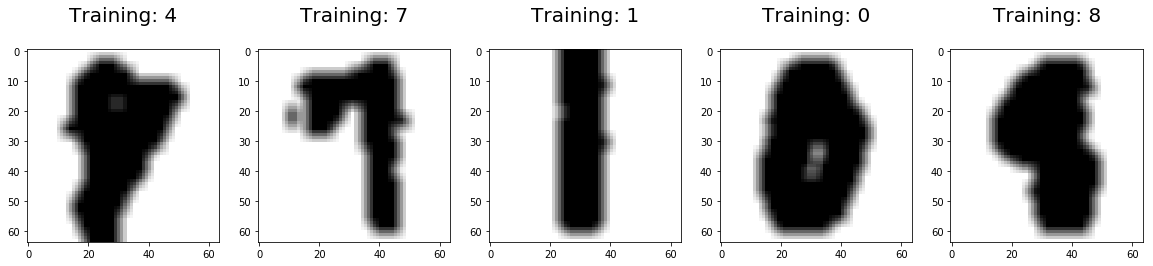

In [16]:
# look at some data for sanity check
def plotter(images, labels, start):
    plt.figure(figsize=(20,4))
    for index, (image, label) in enumerate(zip(images[start:start+5], labels[start:start+5])):
        plt.subplot(1, 5, index + 1)
        plt.imshow(np.reshape(image, (64,64)), cmap= 'gray')
        plt.title('Training: %i\n' % label, fontsize = 20)
plotter(x, y, 0) # first 5 images

In [ ]:
print(x[0, (64*9):(64*10)])

In [17]:
# split it on up
np.random.seed(100) # for determinism
x_train, x_valid, y_train, y_valid = train_test_split(
    x, y, test_size=1/10.0, random_state=0)

In [18]:
# set up conv net
batch_size = 128
epochs = 15

num_classes = 10
img_rows, img_cols, = 64, 64

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_valid = x_valid.reshape(x_valid.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_valid = x_valid.reshape(x_valid.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
y_train = ks.utils.to_categorical(y_train, num_classes)
y_valid = ks.utils.to_categorical(y_valid, num_classes)

In [9]:
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(135000, 64, 64, 1)
(15000, 64, 64, 1)
(135000, 10)
(15000, 10)


In [19]:
# ew magic numbers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=ks.losses.categorical_crossentropy,
              optimizer=ks.optimizers.Adadelta(),
              metrics=['accuracy'])

In [20]:
# go, go, go! go, go speed racer!
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 16s 348us/step - loss: 1.0801 - acc: 0.6544 - val_loss: 0.5084 - val_acc: 0.8506
Epoch 2/15
45000/45000 [==============================] - 15s 341us/step - loss: 0.6148 - acc: 0.8239 - val_loss: 0.4170 - val_acc: 0.8816
Epoch 3/15
45000/45000 [==============================] - 15s 339us/step - loss: 0.4936 - acc: 0.8630 - val_loss: 0.3695 - val_acc: 0.8936
Epoch 4/15
45000/45000 [==============================] - 15s 339us/step - loss: 0.4411 - acc: 0.8802 - val_loss: 0.3560 - val_acc: 0.9038
Epoch 5/15
45000/45000 [==============================] - 15s 339us/step - loss: 0.4010 - acc: 0.8915 - val_loss: 0.3347 - val_acc: 0.9124
Epoch 6/15
45000/45000 [==============================] - 15s 339us/step - loss: 0.3718 - acc: 0.8992 - val_loss: 0.3330 - val_acc: 0.9134
Epoch 7/15
45000/45000 [==============================] - 15s 340us/step - loss: 0.3490 - acc: 0.9065 - val_loss: 0.3

In [21]:
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3313806868553162
Test accuracy: 0.9144


In [ ]:
# testing, 1, 2, testing....
x_test = pd.read_csv("./data/processed_test_x.csv", delimiter=",", header = None)
x_test = x_test.values
x_test = x_test.astype(np.float32)
x_test /= 255
if K.image_data_format() == 'channels_first':
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
else:
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [ ]:
predictions = model.predict_classes(x_test)
ids = list(range(len(predictions)))

print(predictions[:100])
output = pd.DataFrame({'Id': ids, 'Label': predictions})
output.to_csv("./data/ConvNetPredictions.csv", header = True, index = False)